In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import src.DatabaseAsteroidsLib as Dal

import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Import CSV File and initialise in AsteroidsLib class
base_dir = os.path.dirname(os.path.dirname(os.path.abspath('dataManagementAsteroids.ipynb')))
csv_file_path = os.path.join(base_dir, 'input', 'nasa.csv')

lib = Dal.AsteroidsLib(path=csv_file_path)
df = lib.df
df_analysis = lib.df_analysis

### 1. Comprensione del quadro generale

**Obiettivo:** capire il problema che vogliamo andare a risolvere, andando a ragionare sull’intero dataset e sul significato delle features.

Grandezza del dataset

In [4]:
df_analysis.shape

(4687, 40)

Info sulle Features

In [5]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Descrizione generale del dataset

In [6]:
df_analysis.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


### 2. Preparazione del dataset

* esistono variabili inutili o ridondanti?
* la nomenclatura ha senso?
* ci sono delle nuove variabili che vogliamo creare?

In [7]:
df_analysis.duplicated().sum()

0

In questo dataset non ci sono righe duplicate e disponiamo di una nomenclatura delle variabili già soddisfaciente, inoltre per il momento non si vede la necessità di creare nuove variabili.

In [8]:
# Contare il numero di valori null per colonna
null_values = df_analysis.isnull().sum()
print(null_values)

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

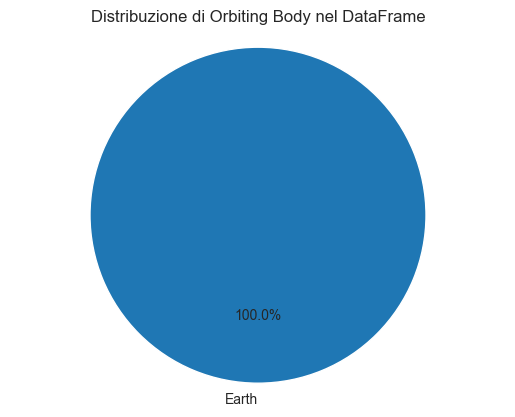

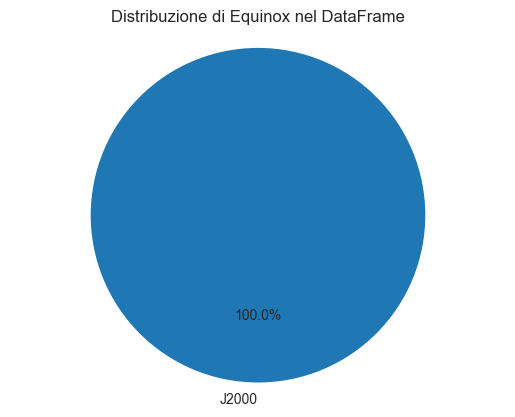

In [9]:
# Per ogni features andiamo a vedere se ci sono delle feature con un solo valore
columns_to_remove=[]

for feature in lib.features:
    # Conta le occorrenze di ciascun valore della feature
    count = df_analysis[feature].value_counts()

    if len(count) == 1:

        # Crea il grafico a torta
        plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribuzione di ' + feature + ' nel DataFrame')
        plt.show()

        columns_to_remove.append(feature)

Poichè le feature `Orbiting Body` e `Equinox` hanno il 100% dei valori uguali rispettivamente a `Earth` e `J2000` possiamo droppare queste features. Inoltre essendo `Neo Reference ID` e `Name` feature utilizzate per identificare gli asteroidi e non direttamente correlate con la loro pericolosità decidiamo di droppare anche queste due features.

In [10]:
columns_to_remove = columns_to_remove + ['Neo Reference ID', 'Name']
df_analysis = lib.remove_features(columns_to_remove)
df_analysis


,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,2016-09-08,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


Controlliamo se ci sono valori duplicati e nel caso li rimuoviamo

In [11]:
print('Numero di valori duplicati: ', df_analysis.duplicated().sum())
df_analysis = lib.remove_duplicates()

Numero di valori duplicati:  0


### 3. Analisi univariata

Fase utile nel comprendere e descrivere le variabili d'interesse.
In questo caso ci concentreremo sulle variabili "categoriali" e cercheremo di capire quanto sono bilanciate le classi all'interno del dataset

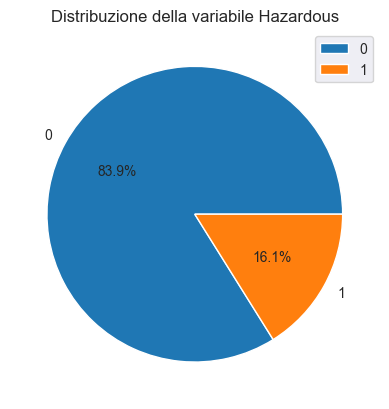

Valori False (= 0) >  3932
Valori True (= 1) >  755


In [12]:
# Calcola i conteggi delle due classi
count_hazardous_0 = df_analysis[lib.target_name].value_counts()[0]
count_hazardous_1 = df_analysis[lib.target_name].value_counts()[1]

plt.pie(df_analysis[lib.target_name].value_counts(), labels=["0", "1"], autopct='%1.1f%%')
plt.legend()
plt.title("Distribuzione della variabile " + lib.target_name)
plt.show()

print('Valori False (= 0) > ', count_hazardous_0)
print('Valori True (= 1) > ', count_hazardous_1)


### 4. Studio delle relazioni tra variabili

Per prima cosa andiamo a vedere se ci sono feature correlate fortemente tra loro attraverso la Matrice di Correlazione

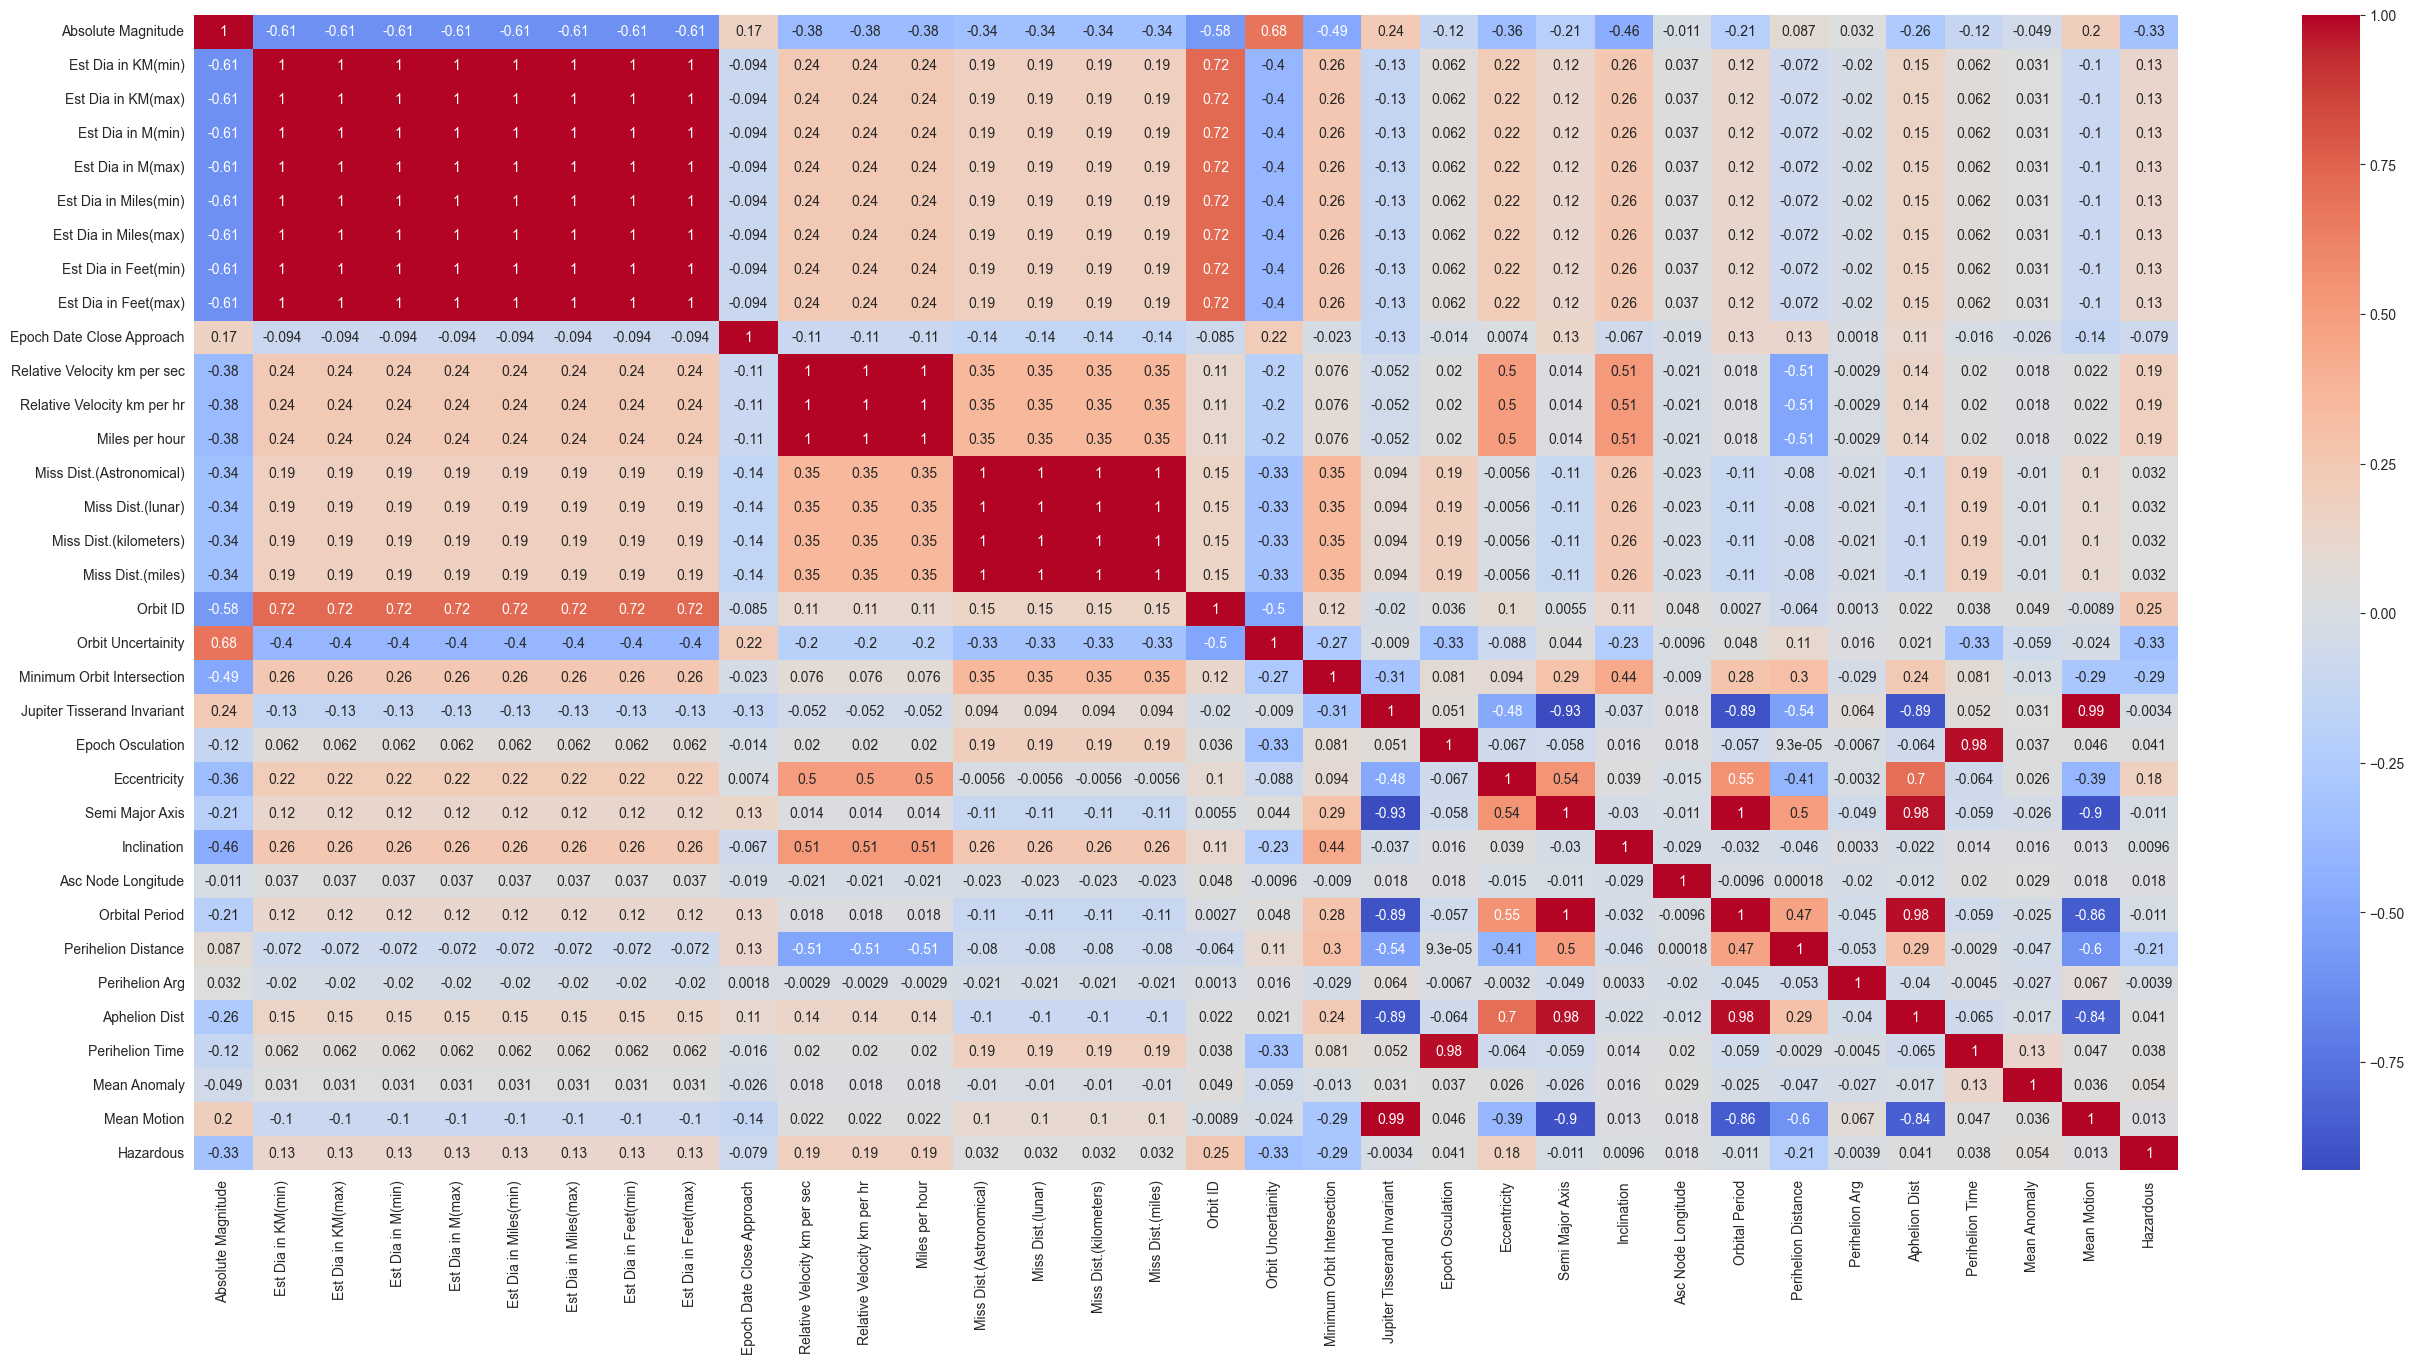

In [13]:
numeric_columns = df_analysis.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(32, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [14]:
threshold = 0.999  # Puoi modificare questo valore a seconda del tuo criterio

correlated_groups = {}

# Trova le coppie di feature correlate sopra la soglia definita e raggruppale
for col in corr_matrix.columns:
    group_name = None
    for group, features in correlated_groups.items():
        #print(group)
        #print(features)
        if any(abs(corr_matrix.loc[col, feature]) >= threshold for feature in features):
            group_name = group
            break
    if group_name is None:
        group_name = f"Group_{len(correlated_groups) + 1}"
        correlated_groups[group_name] = []
    correlated_groups[group_name].append(col)

# Stampare gli array di feature correlate raggruppate
correlated_groups_list = filtered_list = [sublist for sublist in correlated_groups.values() if len(sublist) > 1]
print('Gruppi di feature correlate:')
for groups in correlated_groups_list:
    print('\t', groups)

Gruppi di feature correlate:
	 ['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)']
	 ['Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour']
	 ['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)']


Poichè queste liste di feature sono correlate tra loro con una correlazione del 100% possiamo tenere una sola di queste feature per gruppo e droppare le altre.
Per le feature presenti decidiamo di tenere:
* Est Dia in KM (min)
* Relative Velocity km per sec
* Miss Dist.(Astronomical)

In [15]:
for correlated_features in correlated_groups_list:
    df_analysis = lib.remove_correlated_features(correlated_features)

df_analysis

,Absolute Magnitude,Est Dia in KM(min),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,1995-01-01,788947200000,6.115834,0.419483,17,2017-04-06 08:36:37,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,1995-01-01,788947200000,18.113985,0.383014,21,2017-04-06 08:32:49,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,1995-01-08,789552000000,7.590711,0.050956,22,2017-04-06 09:20:19,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,1995-01-15,790156800000,11.173874,0.285322,7,2017-04-06 09:15:49,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,1995-01-15,790156800000,9.840831,0.407832,25,2017-04-06 08:57:58,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,2016-09-08,1473318000000,22.154265,0.041361,4,2017-04-06 08:24:07,8,0.019777,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,2016-09-08,1473318000000,3.225150,0.006469,2,2017-04-06 08:23:58,6,0.006451,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,2016-09-08,1473318000000,7.191642,0.061009,17,2017-04-06 08:23:43,6,0.059972,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,2016-09-08,1473318000000,11.352090,0.260760,6,2017-04-06 08:23:42,5,0.177510,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [ ]:
sns.pairplot(df_analysis)